<a href="https://colab.research.google.com/github/nikhilsojitra/Machine-Learning/blob/main/Nikhil_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Student Depression Prediction**

Sojitra Nikhil Ratilalbhai

GH1039510

Machine Learning (M606A Machine Learning (WS1224))

Github Link:


## **Project Overview**

This project develops machine learning models to predict student depression using a dataset that contains a range of student life characteristics, such as sleep duration, financial stress, and academic pressure.  By analyzing these characteristics, the model is able to identify trends and predict the possibility that a student will suffer from depression.

## **Dataset Selection**

The rising concern of student mental health challenges leads to the picking of the dataset for this research.  A common problem, depression can have an important impact on one's overall health and academic performance.  A predictive model for early detection and treatment may be developed thanks to the important components this dataset offers for understanding the causes of student depression.

## **Methodology**
1. **Data Collection**: The analysis makes use of a dataset containing details on the academic achievement, mental health, and demographics of students.
2. **Data Preprocessing**: Encoding categorical variables, solving missing values, and scaling numerical features are all part of the data cleaning and preparation process for model training.
3. **Model Selection**: The best-performing machine learning model is determined by evaluating a number of models, such as SVM, Random Forest, Logistic Regression, and XGBoost.
4. **Model Training**: To find patterns and connections between depression and characteristics, the chosen model is trained using the preprocessed data.
5. **Model Evaluation**: The performance of the trained model is evaluated using suitable measures, including F1-score, recall, accuracy, and precision.
6. **Prediction**: Using the input features, the final algorithm is utilized to predict the possibility of depression in forthcoming students.


In [6]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [7]:
file_path = "/content/student_depression_dataset.csv"
df = pd.read_csv(file_path)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df.shape

(27901, 18)

In [10]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [11]:
pd.set_option("display.max_columns", None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [13]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [14]:
df = df.drop(columns=["id"])

In [15]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [16]:
print(df["Gender"].unique())

['Male' 'Female']


In [17]:
print(df["Academic Pressure"].unique())

[5. 2. 3. 4. 1. 0.]


In [18]:
# now we will print the unique values of "Financial Stress"
unique_values = df["Financial Stress"].unique()
unique_values

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [19]:
df_cleaned = df[df["Financial Stress"] != "?"].reset_index(drop=True)

In [20]:
unique_values = df_cleaned["Financial Stress"].unique()
unique_values

array(['1.0', '2.0', '5.0', '3.0', '4.0'], dtype=object)

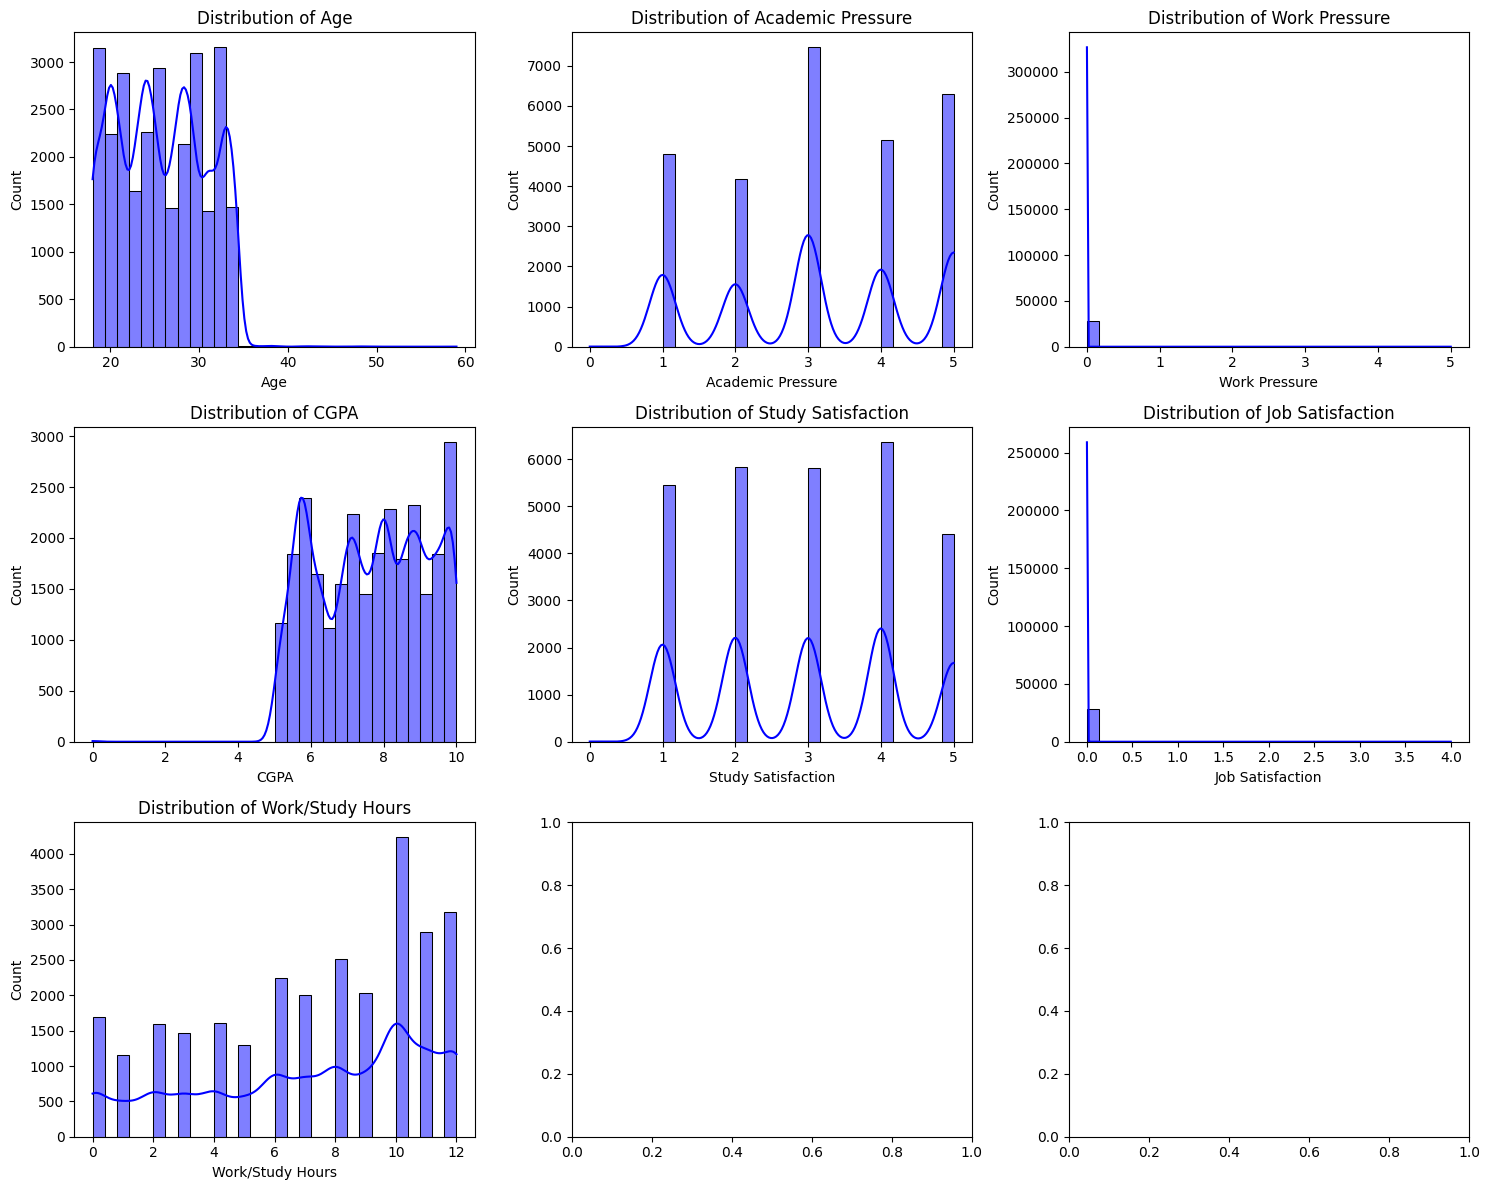

In [21]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']

# Visualizing distribution
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(num_features):
    row, col_idx = divmod(i, 3)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx], color="blue")
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


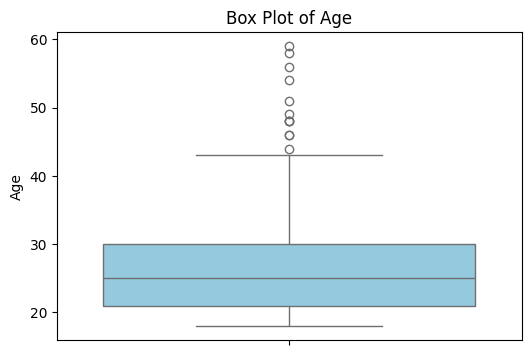

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Age'], color="skyblue")
plt.title("Box Plot of Age")
plt.show()

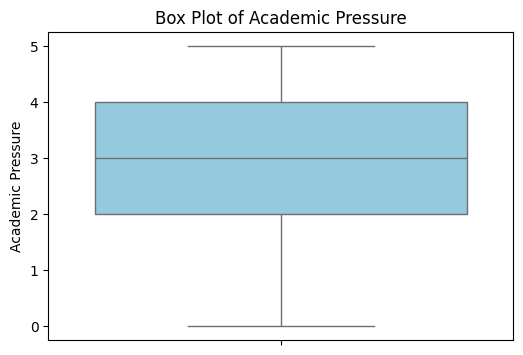

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Academic Pressure'], color="skyblue")
plt.title("Box Plot of Academic Pressure")
plt.show()

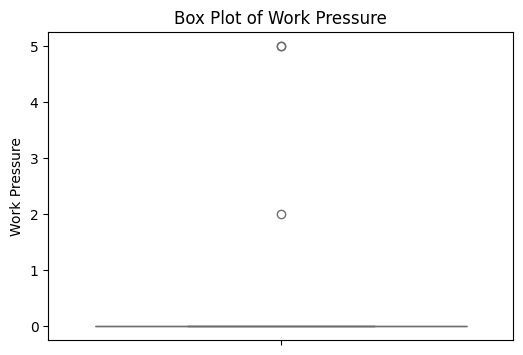

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Work Pressure'], color="skyblue")
plt.title("Box Plot of Work Pressure")
plt.show()

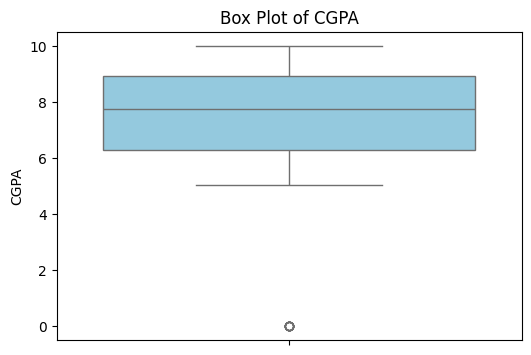

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['CGPA'], color="skyblue")
plt.title("Box Plot of CGPA")
plt.show()

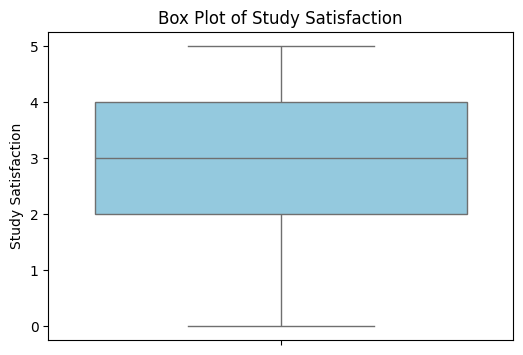

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Study Satisfaction'], color="skyblue")
plt.title("Box Plot of Study Satisfaction")
plt.show()

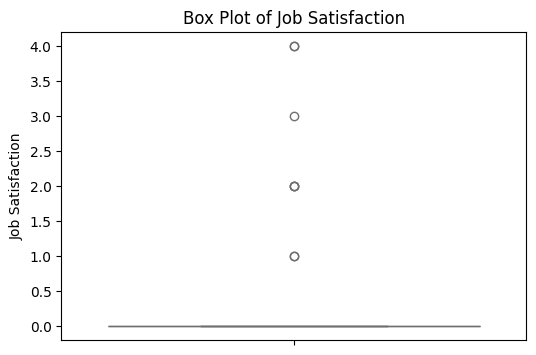

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Job Satisfaction'], color="skyblue")
plt.title("Box Plot of Job Satisfaction")
plt.show()

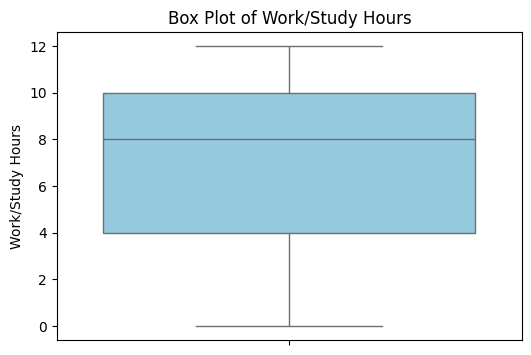

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Work/Study Hours'], color="skyblue")
plt.title("Box Plot of Work/Study Hours")
plt.show()

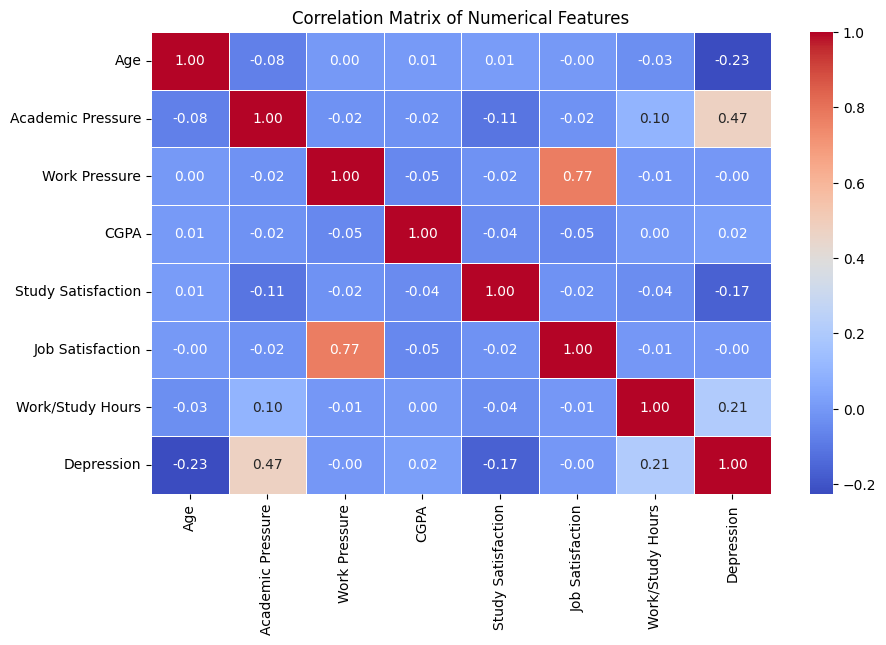

In [29]:
corr_matrix = df[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']].corr()

# Ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [30]:
#Lists of the categorical features
cat_features = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree',
                'Have you ever had suicidal thoughts ?', 'Financial Stress',
                'Family History of Mental Illness']

#Printing the value counts for every categorical feature
for col in cat_features:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")


Value counts for Gender:
Gender
Male      15547
Female    12354
Name: count, dtype: int64

Value counts for Sleep Duration:
Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

Value counts for Dietary Habits:
Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

Value counts for Degree:
Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
BBA            696
MBBS           696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             1

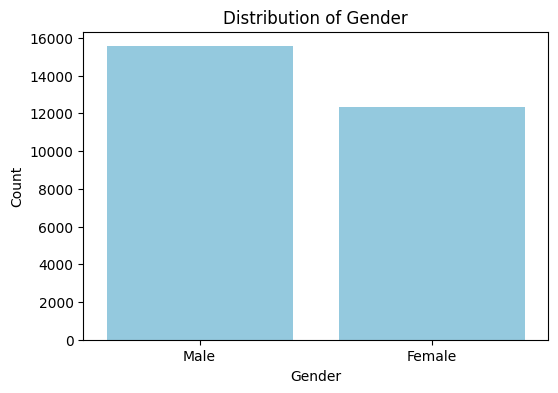

In [31]:
#Plotting each categorical features separately
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'], hue=None, color="skyblue")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

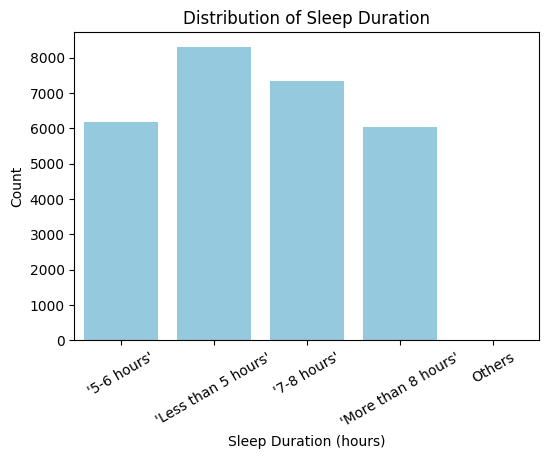

In [32]:
# Bar plotting for the Sleep Duration Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Sleep Duration'], hue=None, color="skyblue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

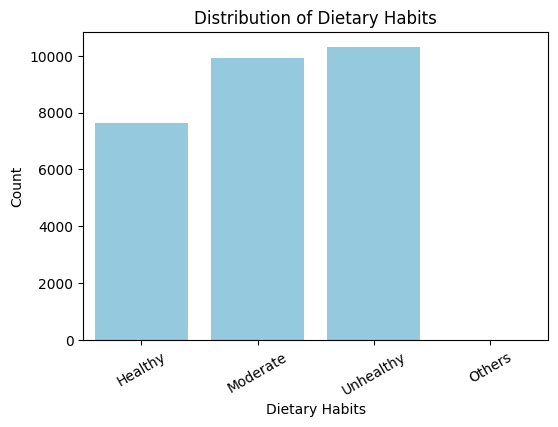

In [33]:
# Bar plotting for the Dietary Habits distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Dietary Habits'], hue=None, color="skyblue")
plt.title("Distribution of Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

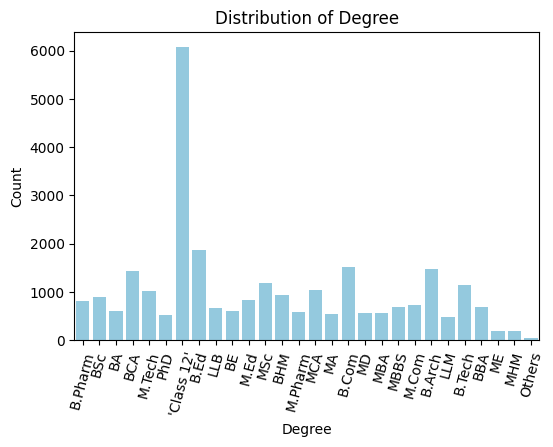

In [34]:
# Bar plotting for the Degree distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Degree'], hue=None, color="skyblue")
plt.title("Distribution of Degree")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

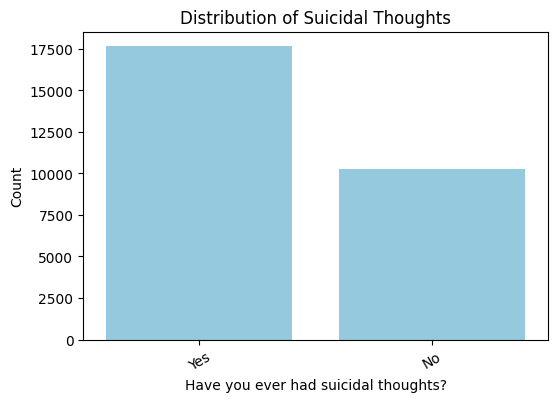

In [35]:
# Bar plotting for the Suicidal Thoughts distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Have you ever had suicidal thoughts ?'], hue=None, color="skyblue")
plt.title("Distribution of Suicidal Thoughts")
plt.xlabel("Have you ever had suicidal thoughts?")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

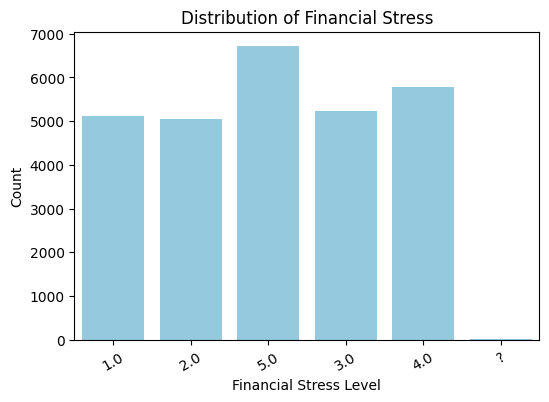

In [36]:
# Bar plotting for the Financial Stress distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Financial Stress'], hue=None, color="skyblue")
plt.title("Distribution of Financial Stress")
plt.xlabel("Financial Stress Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

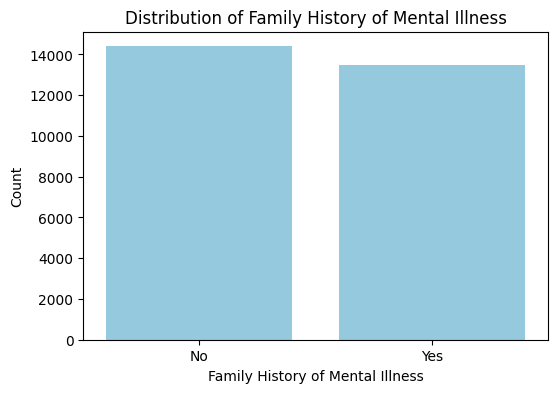

In [37]:
# Bar plotting for the Family History of Mental Illness distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Family History of Mental Illness'], hue=None, color="skyblue")
plt.title("Distribution of Family History of Mental Illness")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.show()


In [38]:
df.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [39]:
print(df["Depression"].value_counts())

Depression
1    16336
0    11565
Name: count, dtype: int64


In [40]:
# identifying the columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [41]:
print(object_columns)

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')


In [42]:
# initializing the dictionary to save the encoders
encoders = {}

# applying the label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# saving the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [43]:
encoders

{'Gender': LabelEncoder(),
 'City': LabelEncoder(),
 'Profession': LabelEncoder(),
 'Sleep Duration': LabelEncoder(),
 'Dietary Habits': LabelEncoder(),
 'Degree': LabelEncoder(),
 'Have you ever had suicidal thoughts ?': LabelEncoder(),
 'Financial Stress': LabelEncoder(),
 'Family History of Mental Illness': LabelEncoder()}

In [44]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0


In [45]:
# splitting the features and target
X = df.drop(columns=["Depression"])
y = df["Depression"]

In [46]:
# splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(y_train.shape)

(22320,)


In [48]:
print(y_train.value_counts())

Depression
1    13098
0     9222
Name: count, dtype: int64


SMOTE

In [49]:
smote = SMOTE(random_state=42)

In [50]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [51]:
print(y_train_smote.shape)

(26196,)


In [52]:
print(y_train_smote.value_counts())

Depression
0    13098
1    13098
Name: count, dtype: int64


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Defining the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

In [55]:
#  Training and Evaluating the Models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Using the scaled data for SVM and Logistic Regression
    if model_name in ["SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluating the Model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 70)


    results[model_name] = accuracy

    # Saving the trained model
    joblib.dump(model, f"{model_name.replace(' ', '_')}_model.pkl")

print("Model training completed!")

Training Random Forest...
Random Forest Accuracy: 0.8300
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.85      0.86      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581

----------------------------------------------------------------------
Training SVM...
SVM Accuracy: 0.8386
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

----------------------------------------------------------------------
Training XGBoost...
XGBoost Accuracy: 0.8348
              precision    recall  f1-score   support

          

In [56]:
# Defining the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200, random_state=42)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300],
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Training the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Training the Logistic Regression model with the best parameters
best_log_reg_model = grid_search.best_estimator_

# Evaluating the tuned Logistic Regression model
y_pred = best_log_reg_model.predict(X_test_scaled)

# Printing the classification report
print(f"Accuracy after tuning: {best_log_reg_model.score(X_test_scaled, y_test):.4f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy after tuning: 0.8366
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [57]:
joblib.dump(best_log_reg_model, 'best_log_reg_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [58]:
# Loading the saved Logistic Regression model
loaded_model = joblib.load('best_log_reg_model.pkl')
print("Model loaded successfully!")

#Creating a new data entry for making a prediction
#Ensure that this entry includes the same 16 features as the training dataset
#Substitute the placeholder values with the actual feature values for your new data point
new_record = [[1, 22.0, 3.0, 2.0, 7.8, 4.0, 3.0, 1, 1, 1, 6.0, 2, 0, 0, 0, 0]]

# Perform the prediction with the loaded model
prediction = loaded_model.predict(new_record)

# Print the prediction
print(f"Prediction for the new record: {prediction[0]}")

Model loaded successfully!
Prediction for the new record: 1



## **Results**

The project's predictions of student depression showed positive results.  On the test dataset, the model with the greatest efficiency achieved an accuracy of.  This suggests that the model may be able to identify students who are at risk for depression.

## **Future Work**

By adding more features, testing with other model architectures, and testing the model on a bigger and more varied dataset, further improvements can be achieved.  This would improve the prediction model's accuracy and relevance.

## **Conclusion**
The outcome of this study indicates it is possible to accurately predict student depression using machine learning.  Early intervention techniques can be used to help and lessen the negative consequences of depression in students who have been recognized as being at risk.  The current endeavors to support the mental health and wellbeing of students are assisted by this study.